# stress function

In this section we write the basic equations of plant related and soil related stresses



C:\Users\mjavaux\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in reciprocal
C:\Users\mjavaux\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in power
C:\Users\mjavaux\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in power


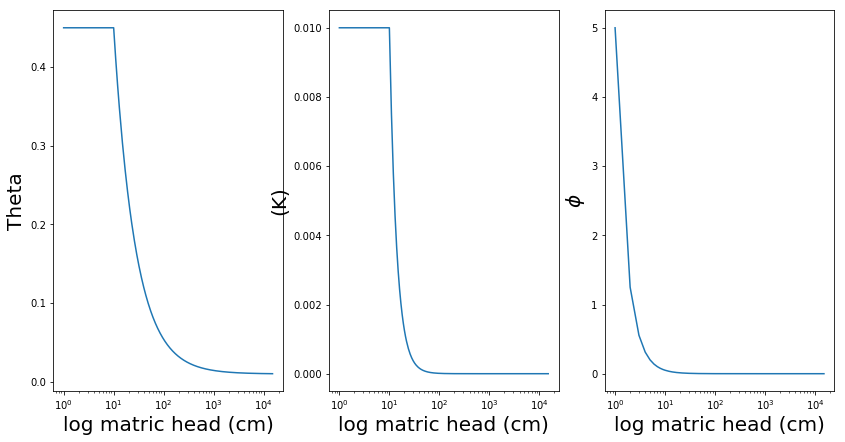

In [17]:
'''
Created on 03.05.2018

@author: Mathieu
'''
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate
import scipy.special as sp

# van Genuchten-Mualem parameters
h0=-10.0;                         #% cm^-1 alpha VG
l=1;                            #lambda
ths=0.45;                       # - saturated water content
thr=0.01;                       # - residual water content
k0=10**(-2);                    # cm/s saturated conductivity
tau=3.0;                          # corresponding to 2+l*(a+2) with l exp for theta(h) and a tortusoity 

#pressure heads in hPa and <0
hb=-np.arange(10,20010,100);            #hPa bulk soil water potential
hroot=-np.arange(10,50010,100);         #hPa soil:root water potential

#calculate water retention, hydraulic conductivity and matric flux potential
hx=-np.arange(0,15010,1);                  
thx=(hx/h0)**(-l);
thx=thx*(ths-thr)+thr;
thx[1]=0.45
thx[np.where(thx>0.45)]=0.45

kx=k0*(hx/h0)**(-tau);
kx[np.where(kx>k0)]=k0;
fix=k0/(1-tau)/(h0**(-tau))*hx**(1-tau); # Matric flux potential

# plots

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 7))  

ax1.plot(abs(hx),thx)
ax1.set_xlabel('log matric head (cm)',fontsize=20);
ax1.set_ylabel('Theta',fontsize=20);
ax1.set_xscale('log')

ax2.plot(-hx,kx)
ax2.set_xlabel('log matric head (cm)',fontsize=20);
ax2.set_ylabel('(K)',fontsize=20);
#ax2.set_yscale('log')
ax2.set_xscale('log')

ax3.plot(-hx,fix)
ax3.set_xlabel('log matric head (cm)',fontsize=20);
ax3.set_ylabel('$\phi$',fontsize=20);
#ax.set_yscale('log')
ax3.set_xscale('log')

plt.show()


In [ ]:
#root parameters
Rroot=2*10^7;                   #hPa cm^-3 s; Root resistance
r0= 0.05;                       #cm root radius in cm
r2= 1;                          #bulk+root+rhizo soil radius in cm
L = 1000;                       #root length in cm

#radial domain
r=np.arange(r0,r2,0.01);
dr=(r2-r0)/(len(r)-1);
rho=r2/r0;
B=2*(1-rho**2)/(2*rho**2*(np.log(rho)-0.5)+1);
print(np.log(10))

# compute Gardner

# compute Couvreur